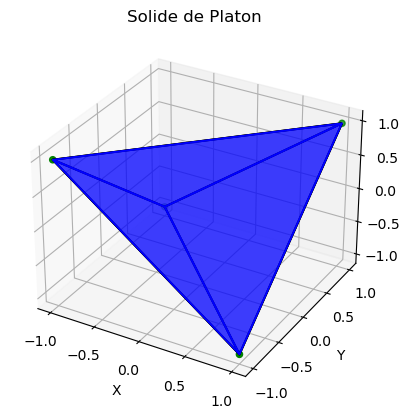

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

def plot_platonic_solid(vertices, faces, face_color='b', edge_color='k', vertex_color='g'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Affichage des sommets
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c=vertex_color, marker='o')

    # Affichage des arêtes
    edges = [[vertices[j, :] for j in face] + [vertices[face[0], :]] for face in faces]
    edge_collection = Line3DCollection(edges, color=edge_color)
    ax.add_collection3d(edge_collection)

    # Affichage des faces
    faces_collection = Poly3DCollection([vertices[face, :] for face in faces], color=face_color, alpha=0.5)
    ax.add_collection3d(faces_collection)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Solide de Platon')

    plt.show()

# Coordonnées des sommets pour un tétraèdre
tetrahedron_vertices = np.array([
    [1, 1, 1],
    [1, -1, -1],
    [-1, 1, -1],
    [-1, -1, 1]
])

# Indices des faces pour un tétraèdre
tetrahedron_faces = np.array([
    [0, 1, 2],
    [0, 1, 3],
    [0, 2, 3],
    [1, 2, 3]
])

# Couleurs correspondantes
tetrahedron_vertex_color = 'g'
tetrahedron_edge_color = 'k'
tetrahedron_face_color = 'b'

plot_platonic_solid(tetrahedron_vertices, tetrahedron_faces, face_color=tetrahedron_face_color, edge_color=tetrahedron_edge_color, vertex_color=tetrahedron_vertex_color)


In [1]:
import numpy as np
from mayavi import mlab

def plot_regular_tetrahedron(vertices):
    mlab.figure(bgcolor=(1, 1, 1), fgcolor=(0, 0, 0))
    
    # Tracé du tétraèdre régulier
    x = vertices[:, 0]
    y = vertices[:, 1]
    z = vertices[:, 2]
    faces = [
        [0, 1, 2], [0, 1, 3], [1, 2, 3], [0, 2, 3]
    ]
    for face in faces:
        mlab.triangular_mesh(x[face], y[face], z[face], [(0, 1, 2)])
    
    mlab.xlabel('X')
    mlab.ylabel('Y')
    mlab.zlabel('Z')
    mlab.show()

# Fonction pour calculer les sommets du tétraèdre régulier
def regular_tetrahedron_vertices(size):
    vertices = np.array([
        [0, 0, size / np.sqrt(2)],
        [size / 2, 0, -size / (2 * np.sqrt(2))],
        [-size / 2, 0, -size / (2 * np.sqrt(2))],
        [0, size * np.sqrt(2 / 3), 0]
    ])
    return vertices

# Calcul des sommets du tétraèdre régulier
tetrahedron_size = 1.0
tetrahedron_vertices = regular_tetrahedron_vertices(tetrahedron_size)

# Tracé du tétraèdre régulier
plot_regular_tetrahedron(tetrahedron_vertices)


********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



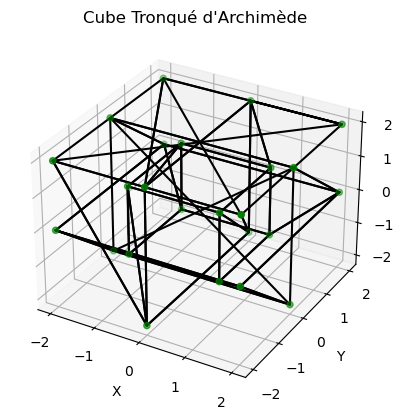

In [8]:
def plot_truncated_cube():
    # Paramètres de la figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Sommets et faces du cube tronqué d'Archimède
    vertices = truncated_cube_vertices()
    faces = truncated_cube_faces()

    # Affichage des sommets
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='g', marker='o')

    # Affichage des arêtes
    for face in faces:
        # Ajout du premier sommet à la fin pour fermer la boucle
        face.append(face[0])
        ax.plot([vertices[face[i], 0] for i in range(len(face))],
                [vertices[face[i], 1] for i in range(len(face))],
                [vertices[face[i], 2] for i in range(len(face))], color='k')

    # Paramètres d'affichage
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Cube Tronqué d\'Archimède')

    plt.show()

# Tracer le cube tronqué d'Archimède
plot_truncated_cube()


In [ ]:
import numpy as np
from mayavi import mlab

def plot_truncated_cube(vertices):
    mlab.figure(bgcolor=(1, 1, 1), fgcolor=(0, 0, 0))
    
    # Tracé du cube tronqué
    x = vertices[:, 0]
    y = vertices[:, 1]
    z = vertices[:, 2]
    faces = [
        [0, 1, 5, 4], [1, 2, 6, 5], [2, 3, 7, 6], [3, 0, 4, 7],
        [0, 3, 2, 1], [4, 5, 6, 7],
        [8, 9, 13, 12], [9, 10, 14, 13], [10, 11, 15, 14], [11, 8, 12, 15],
        [8, 11, 10, 9], [12, 13, 14, 15],
        [0, 1, 9, 8], [1, 5, 13, 9], [5, 4, 12, 13], [4, 0, 8, 12],
        [2, 3, 11, 10], [3, 7, 15, 11], [7, 6, 14, 15], [6, 2, 10, 14]
    ]
    for face in faces:
        mlab.triangular_mesh(x[face], y[face], z[face], [(0, 1, 2)])
    
    mlab.xlabel('X')
    mlab.ylabel('Y')
    mlab.zlabel('Z')
    mlab.show()

# Fonction pour calculer les sommets du cube tronqué d'Archimède
def truncated_archimedean_cube_vertices(size):
    a = size / 2.0
    vertices = np.array([
        [a, a, -a], [a, -a, -a], [-a, -a, -a], [-a, a, -a],
        [a, a, a], [a, -a, a], [-a, -a, a], [-a, a, a],
        [a, -a, 0], [-a, -a, 0], [-a, a, 0], [a, a, 0],
        [a, 0, -a], [-a, 0, -a], [-a, 0, a], [a, 0, a],
        [0, -a, -a], [0, -a, a], [0, a, a], [0, a, -a]
    ])
    return vertices

# Calcul des sommets du cube tronqué d'Archimède
cube_size = 1.0
cube_vertices = truncated_archimedean_cube_vertices(cube_size)

# Tracé du cube tronqué d'Archimède
plot_truncated_cube(cube_vertices)


********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



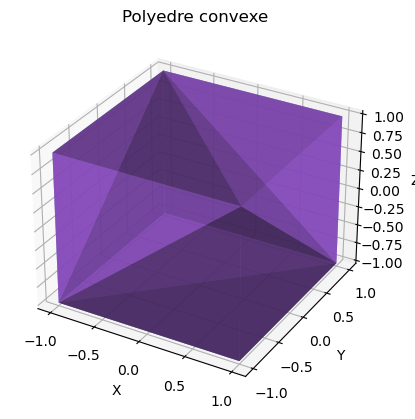

In [4]:
def plot_truncated_cube_polar(vertices, convex_hull):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Tracé du polyèdre convexe
    ax.plot_trisurf(convex_hull.points[:, 0], convex_hull.points[:, 1], convex_hull.points[:, 2],
                    triangles=convex_hull.simplices, color='skyblue', alpha=0.5, label='Polyèdre Convexe')

    # Tracé du polaire
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                    triangles=convex_hull.simplices, color='darkorchid', alpha=0.5, label='Polaire')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Polyedre convexe')
    # Suppression de l'appel à la légende pour contourner l'erreur
    # ax.legend()
    plt.show()

# Calcul de l'enveloppe convexe du cube tronqué
cube_size = 1.0
cube_vertices = truncated_cube_vertices(cube_size)
convex_hull = ConvexHull(cube_vertices)

# Tracé du cube tronqué avec son polaire
plot_truncated_cube_polar(cube_vertices, convex_hull)


In [2]:
import numpy as np
from mayavi import mlab
from scipy.spatial import ConvexHull

def plot_convex_polyhedron(vertices):
    mlab.figure(bgcolor=(1, 1, 1), fgcolor=(0, 0, 0))
    
    # Tracé du polyèdre convexe
    x = vertices[:, 0]
    y = vertices[:, 1]
    z = vertices[:, 2]
    faces = [
        [0, 1, 2], [0, 1, 4], [0, 2, 3], [0, 3, 4],
        [1, 2, 5], [1, 4, 5], [2, 3, 5], [3, 4, 5]
    ]
    for face in faces:
        mlab.triangular_mesh(x[face], y[face], z[face], [(0, 1, 2)])
    
    mlab.xlabel('X')
    mlab.ylabel('Y')
    mlab.zlabel('Z')
    
    return mlab.gcf()

# Fonction pour calculer les sommets du polaire du polyèdre convexe
def calculate_polar(vertices):
    polar_vertices = vertices / np.linalg.norm(vertices, axis=1)[:, np.newaxis]
    return polar_vertices

def plot_polar(polar_vertices):
    # Calcul de l'enveloppe convexe du polaire
    polar_hull = ConvexHull(polar_vertices)

    # Tracé du polaire
    mlab.triangular_mesh(polar_hull.points[:, 0], polar_hull.points[:, 1], polar_hull.points[:, 2],
                         polar_hull.simplices, color=(0.53, 0.81, 0.98), opacity=0.5, representation='surface', name='Polaire')

# Définition des sommets du polyèdre convexe arbitraire
vertices = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [-1, 0, 0],
    [0, -1, 0],
    [0, 0, -1]
])

# Tracé du polyèdre convexe
polyhedron_fig = plot_convex_polyhedron(vertices)

# Calcul et tracé du polaire
polar_vertices = calculate_polar(vertices)
plot_polar(polar_vertices)

mlab.show()


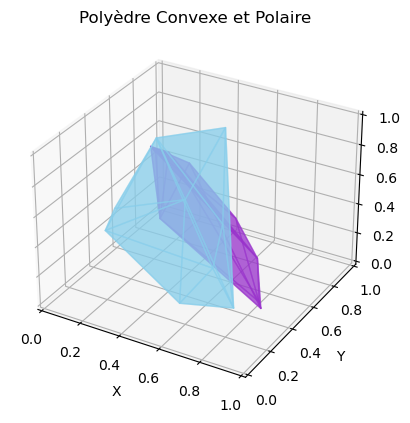

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

def plot_polar_3d(polar_vertices, convex_hull):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Tracé du polyèdre convexe
    convex_faces = [convex_hull.points[face] for face in convex_hull.simplices]
    ax.add_collection3d(Poly3DCollection(convex_faces, alpha=0.5, color='skyblue', label='Polyèdre Convexe'))

    # Tracé du polaire
    polar_faces = [polar_vertices[face] for face in convex_hull.simplices]
    ax.add_collection3d(Poly3DCollection(polar_faces, alpha=0.5, color='darkorchid', label='Polaire'))

    # Paramètres d'affichage
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Polyèdre Convexe et Polaire')

    plt.show()

# Génération de quelques points aléatoires pour créer le polyèdre convexe en 3D
np.random.seed(42)
points = np.random.rand(10, 3)

# Calcul de l'enveloppe convexe du polyèdre
convex_hull = ConvexHull(points)

# Calcul du polaire du polyèdre
polar_points = points / np.linalg.norm(points, axis=1)[:, np.newaxis]  # Normalisation des points
polar_convex_hull = ConvexHull(polar_points)

# Tracé du polyèdre convexe avec son polaire et points spécifiques
plot_polar_3d(polar_points, convex_hull)


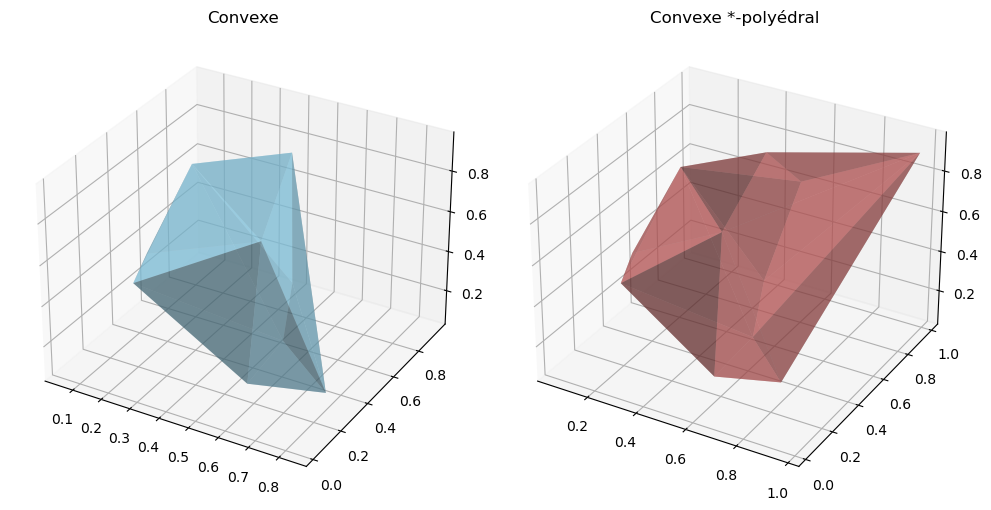

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

# Générer des points pour le convexe
np.random.seed(42)
points_convex = np.random.rand(10, 3)
convex_hull = ConvexHull(points_convex)

# Générer des points pour le cône
cone_direction = np.array([0.5, 0.5, 0.5])  # Direction du cône
points_cone = np.random.rand(5, 3) * 0.5  # Points dans le cône
points_cone = points_cone + np.outer(np.ones(5), cone_direction)

# Combinaison du convexe et du cône
points_combined = np.vstack((points_convex, points_cone))
hull_combined = ConvexHull(points_combined)

# Tracé du convexe et du cône combinés en 3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Tracé du convexe
ax.plot_trisurf(convex_hull.points[:, 0],
                convex_hull.points[:, 1],
                convex_hull.points[:, 2],
                triangles=convex_hull.simplices,
                color='skyblue', alpha=0.5)
ax.set_title('Convexe')

# Tracé du cône
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(hull_combined.points[:, 0],
                hull_combined.points[:, 1],
                hull_combined.points[:, 2],
                triangles=hull_combined.simplices,
                color='indianred', alpha=0.5)
ax.set_title('Convexe *-polyédral')

plt.tight_layout()
plt.show()


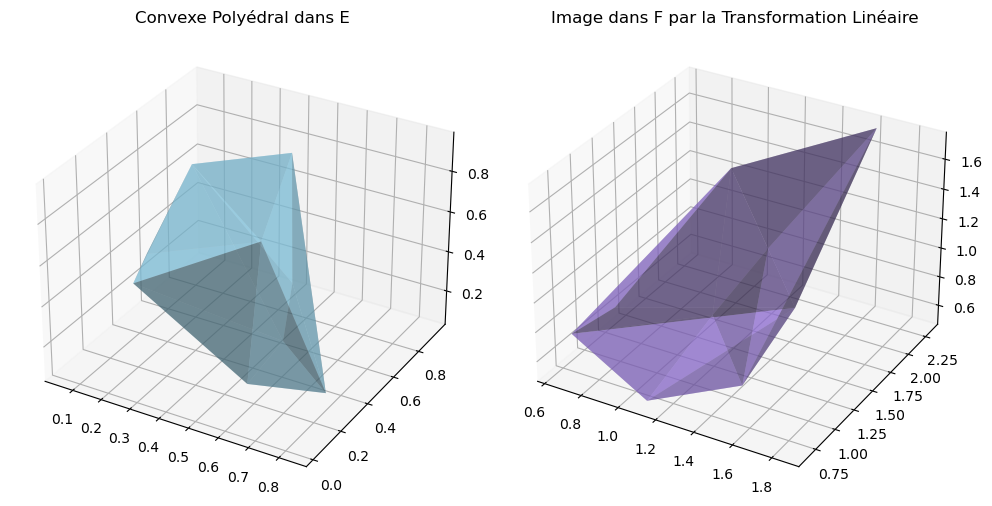

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

# Générer un convexe polyédral aléatoire dans E
np.random.seed(42)
points_e = np.random.rand(10, 3)  # 10 points dans l'espace 3D
convex_hull_e = ConvexHull(points_e)

# Définir une matrice de transformation linéaire
A = np.array([[1.5, 0.5, 0.8],
              [0.5, 2.0, 0.3],
              [0.3, 0.8, 1.2]])

# Appliquer la transformation linéaire
points_f = np.dot(points_e, A.T)

# Obtenir l'enveloppe convexe de l'image transformée
convex_hull_f = ConvexHull(points_f)

# Tracé du convexe polyédral dans E
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_trisurf(points_e[:, 0], points_e[:, 1], points_e[:, 2],
                 triangles=convex_hull_e.simplices,
                 color='skyblue', alpha=0.5)
ax1.set_title('Convexe Polyédral dans E')

# Tracé de l'image du convexe polyédral dans F
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_trisurf(points_f[:, 0], points_f[:, 1], points_f[:, 2],
                 triangles=convex_hull_f.simplices,
                 color='mediumpurple', alpha=0.5)
ax2.set_title('Image dans F par la Transformation Linéaire')

plt.tight_layout()
plt.show()


Entrez les coefficients de la matrice de transformation linéaire (3x3) séparés par des espaces :
3 2 3 2 3 2 3 5 7 


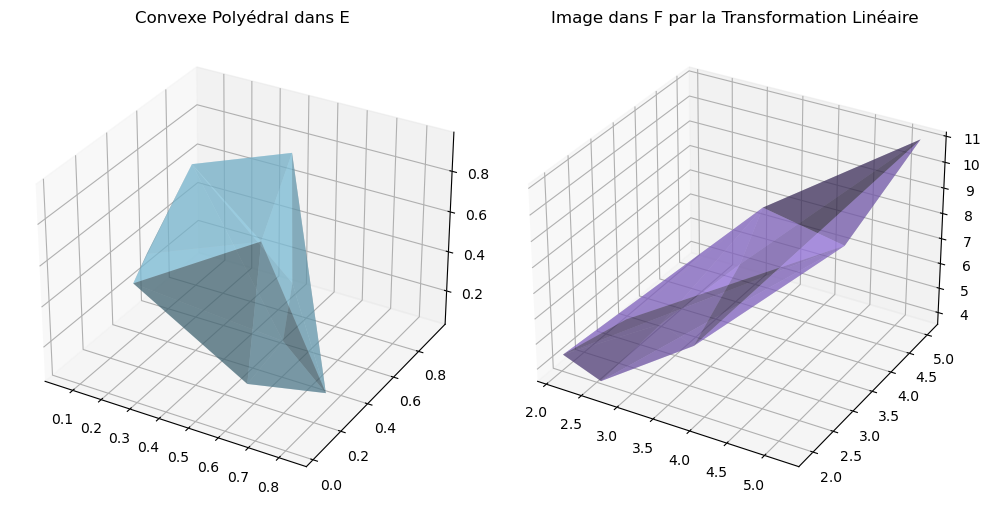

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

# Demander à l'utilisateur d'entrer les coefficients de la matrice de transformation linéaire
print("Entrez les coefficients de la matrice de transformation linéaire (3x3) séparés par des espaces :")
A_values = input().split()
A = np.array(A_values, dtype=float).reshape(3, 3)

# Générer un convexe polyédral aléatoire dans E
np.random.seed(42)
points_e = np.random.rand(10, 3)  # 10 points dans l'espace 3D
convex_hull_e = ConvexHull(points_e)

# Appliquer la transformation linéaire
points_f = np.dot(points_e, A.T)

# Obtenir l'enveloppe convexe de l'image transformée
convex_hull_f = ConvexHull(points_f)

# Tracé du convexe polyédral dans E
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_trisurf(points_e[:, 0], points_e[:, 1], points_e[:, 2],
                 triangles=convex_hull_e.simplices,
                 color='skyblue', alpha=0.5)
ax1.set_title('Convexe Polyédral dans E')

# Tracé de l'image du convexe polyédral dans F
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_trisurf(points_f[:, 0], points_f[:, 1], points_f[:, 2],
                 triangles=convex_hull_f.simplices,
                 color='mediumpurple', alpha=0.5)
ax2.set_title('Image dans F par la Transformation Linéaire')

plt.tight_layout()
plt.show()


Entrez la dimension de l'espace (2 pour 2D, 3 pour 3D): 3
Entrez les coefficients de la matrice de transformation linéaire (3x3) séparés par des espaces :
12 2 4 6 7 8 9 5 1


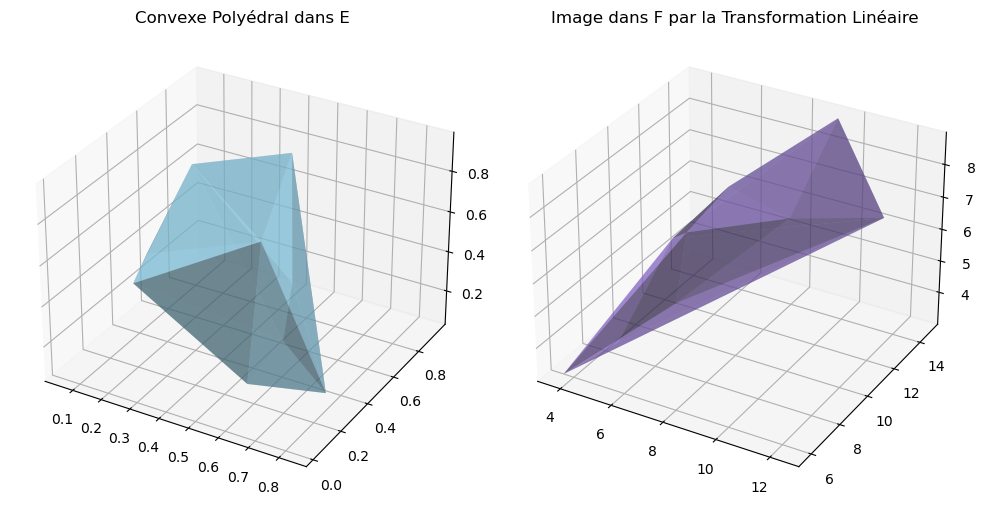

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

# Demander à l'utilisateur d'entrer la dimension de l'espace (2D ou 3D)
while True:
    dimension = input("Entrez la dimension de l'espace (2 pour 2D, 3 pour 3D): ")
    if dimension in ['2', '3']:
        dimension = int(dimension)
        break
    else:
        print("Veuillez entrer 2 ou 3.")

# Demander à l'utilisateur d'entrer les coefficients de la matrice de transformation linéaire
print(f"Entrez les coefficients de la matrice de transformation linéaire ({dimension}x{dimension}) séparés par des espaces :")
A_values = input().split() #est utilisé pour séparer les valeurs entrées par l'utilisateur
A = np.array(A_values, dtype=float).reshape(dimension, dimension)

# Générer un convexe polyédral aléatoire dans E
np.random.seed(42) #les mêmes nombres aléatoires seront générés 
points_e = np.random.rand(10, dimension)  # 10 points dans l'espace 2D ou 3D
convex_hull_e = ConvexHull(points_e)

# Appliquer la transformation linéaire
points_f = np.dot(points_e, A.T) #produit matriciel

# Obtenir l'enveloppe convexe de l'image transformée
convex_hull_f = ConvexHull(points_f)

# Tracé du convexe polyédral dans E
fig = plt.figure(figsize=(10, 5))

if dimension == 3:
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')#1 une rangee 2 deux colonnes 1 subplot actuel est le premier
    ax1.plot_trisurf(points_e[:, 0], points_e[:, 1], points_e[:, 2],
                     triangles=convex_hull_e.simplices,
                     color='skyblue', alpha=0.5) #racer une surface tridimensionnelle 
    #.simples contient les indices des points qui forment chaque triangle dans l'enveloppe convexe calculée.
    ax1.set_title('Convexe Polyédral dans E')
else:
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(points_e[:, 0], points_e[:, 1], 'ko')
    for simplex in convex_hull_e.simplices:
        ax1.plot(points_e[simplex, 0], points_e[simplex, 1], 'r-')
    ax1.set_title('Convexe Polyédral dans E')

# Tracé de l'image du convexe polyédral dans F
if dimension == 3:
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_trisurf(points_f[:, 0], points_f[:, 1], points_f[:, 2],
                     triangles=convex_hull_f.simplices,
                     color='mediumpurple', alpha=0.5)
    ax2.set_title('Image dans F par la Transformation Linéaire')
else:
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(points_f[:, 0], points_f[:, 1], 'ko')
    for simplex in convex_hull_f.simplices:
        ax2.plot(points_f[simplex, 0], points_f[simplex, 1], 'r-')
    ax2.set_title('Image dans F par la Transformation Linéaire')

plt.tight_layout()
plt.show()
